# 银行股

- 作者：DGC'Idea
- 版本：V0.1   
- 更新日期：2018年4月6日

----------
- 选择国有银行4只：工商银行、建设银行、中国银行、农业银行；
- 选择民营银行4只：民生银行、浦发银行、兴业银行、招商银行。

In [2]:
#导入库
import numpy as np
import pandas as pd
import time
import jqdata

#引入自定义库
import sys
sys.path.append('/home/jquser')

from pf_stk import *
from vd_stk import stkView 

bank=Stk('csv','../Data/','bank') 
view=stkView(bank,u'银行股')   

数据引擎：运行于研究
个股框架：运行于研究


## 1.股票池

### 1.1.生成股票池

In [2]:
#银行股股票池
bank_pool={
    '601398.XSHG':'工商银行',
    '601988.XSHG':'中国银行',
    '601939.XSHG':'建设银行',
    '601288.XSHG':'农业银行',
    '600036.XSHG':'招商银行',
    '600000.XSHG':'浦发银行',
    '600016.XSHG':'民生银行',
    '601166.XSHG':'兴业银行',
    '601128.XSHG':'常熟银行',
    '601998.XSHG':'中信银行',
    '601009.XSHG':'南京银行',
    '601818.XSHG':'光大银行',
    '603323.XSHG':'吴江银行',
    '601997.XSHG':'贵阳银行',
    '600908.XSHG':'无锡银行',
    '601229.XSHG':'上海银行',
    '600015.XSHG':'华夏银行',
    '600926.XSHG':'杭州银行',
    '601169.XSHG':'北京银行',
    '600919.XSHG':'江苏银行',
    '000001.XSHE':'平安银行',
    '002807.XSHE':'江阴银行',
    '002142.XSHE':'宁波银行',
    }
    
bank.pool.create(bank_pool)

### 1.2.查看股票池

In [3]:
bank.pool.show()

,名称
600036,招商银行
600000,浦发银行
600926,杭州银行
002142,宁波银行
601939,建设银行
601128,常熟银行
600016,民生银行
601288,农业银行
601818,光大银行
601997,贵阳银行


## 2.获取数据
1. 设置当前股票池，以下数据获取和分析皆是针对当前股票池。
1. 获取行业列表，用于对股票进行行业分类；
2. 获取股票日线数据，包括行情数据、估值数据。

In [2]:
bank.data.update(bank.pool.track)

数据更新：股票，已更新 4 个行 2018年08月10日 


## 3.数据分析
- 估值分析：PE-TTM（滚动市盈率）、PB（平均市净率）；
- 财务指标分析：毛利率、ROE（年报、扣非后净资产收益率）、近五年或三年的平均ROE、近三年营业收入复合增长率、近三年净利润复合增长率、股息率、PEG。

In [3]:
bank.value.update(bank.pool.track,[5,3,1],force=True)
bank.change.update(bank.pool.track,['close','pe','pb'],force=True)

数据分析：股票估值，分析完毕 ] 数据 
数据分析：股票行情，分析完毕 ] 数据 据 


/home/jquser/tl.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['pre']=df.iloc[:,0].shift(1)


# 4.估值表
- PE-TTM：滚动市盈率，为近五年的数据；
- 高度：表示时间窗内（五年），低于当前值的个数与全部样本个数的比例，代表当前值在历史统计值的估值位置；
- 最小值：表示时间窗内（五年）理论最小估值，表示其估值下限；
- 最大值：表示时间窗内（五年）理论最大估值，表示其估值上限；
- 中位数：表示时间窗内（五年），代表该指数的理论合理估值；
- 距底：表示当前值与最低值的距离，代表最大的可能跌幅。 

In [4]:
view.table()

## 5.银行专用财务指标表
- 净息差指的是银行净利息收入和银行全部生息资产的比值；
- 核心一级资本充足率：是指核心资本与加权风险资产总额的比率（参考值>=6%）；
- 不良贷款率：金融机构不良贷款占总贷款余额的比重；
- 不良贷款拨备覆盖率：是衡量商业银行贷款损失准备金计提是否充足的一个重要指标。该项指标从宏观上反映银行贷款的风险程度及社会经济环境、诚信等方面的情况。不良贷款拨备覆盖率=贷款损失准备/(次级类资产+可疑类资产+损失类资产)*100%。

In [3]:

def get_bank_stock_indicator(code,date=2017): 
    q = query(
        bank_indicator.code,
        bank_indicator.net_interest_margin,
        bank_indicator.core_level_capital_adequacy_ratio,
        bank_indicator.Nonperforming_loan_rate,
        bank_indicator.non_performing_loan_provision_coverage,
    ).filter(
        bank_indicator.code==code
    )
    df=pd.DataFrame()
    #获取近五年财务信息
    for i in range(0,5):
        rets=get_fundamentals(q, statDate=str(date-i))
        df = pd.concat([df,rets],axis=0)    
    #净息差
    nim=df['net_interest_margin'].iloc[0]
    nim_mean=mean(df['net_interest_margin'])
    #核心一级资本充足率
    clcar=df['core_level_capital_adequacy_ratio'].iloc[0]
    clcar_mean=mean(df['core_level_capital_adequacy_ratio'])
    #不良贷款率
    nlr=df['Nonperforming_loan_rate'].iloc[0]
    #不良贷款拨备覆盖率
    nplpc=df['non_performing_loan_provision_coverage'].iloc[0]
    return (nim,clcar,nlr,nplpc)


def get_bank_data(stock_list): 
    data_list = []
    code_list=[]
    for code in stock_list:  
        stock_name=get_security_info(code).display_name
        print "\r" +u'正在分析:', code[0:6],stock_name,
        (nim,clcar,nlr,nplpc)=get_bank_stock_indicator(code)
        data_list.append([stock_name,nim,clcar,nlr,nplpc])
        code_list.append(code[0:6])  
    #组织数据
    columns=['名称','净息差','核心一级资本充足率','不良贷款率','不良贷款拨备覆盖率']
    df=pd.DataFrame(data=data_list,index=code_list,columns=columns) 
    df=df.sort(['净息差'],ascending=False)  
    return df



df=get_bank_data(bank.pool.track)
df

-正在分析: 601009 南京银行 

,名称,净息差,核心一级资本充足率,不良贷款率,不良贷款拨备覆盖率
601128,常熟银行,3.2303,9.88,1.14,325.93
603323,吴江银行,2.9546,12.27,1.64,201.50
601997,贵阳银行,2.6700,9.54,1.34,269.72
600036,招商银行,2.4300,12.06,1.61,262.11
000001,平安银行,2.3700,8.28,1.70,151.08
002807,江阴银行,2.3300,12.94,2.39,192.13
601288,农业银行,2.2800,10.63,1.81,208.37
601398,工商银行,2.2200,12.77,1.55,154.07
601939,建设银行,2.2100,13.09,1.49,171.08
600908,无锡银行,2.1500,9.93,1.38,193.77


## 4.行情

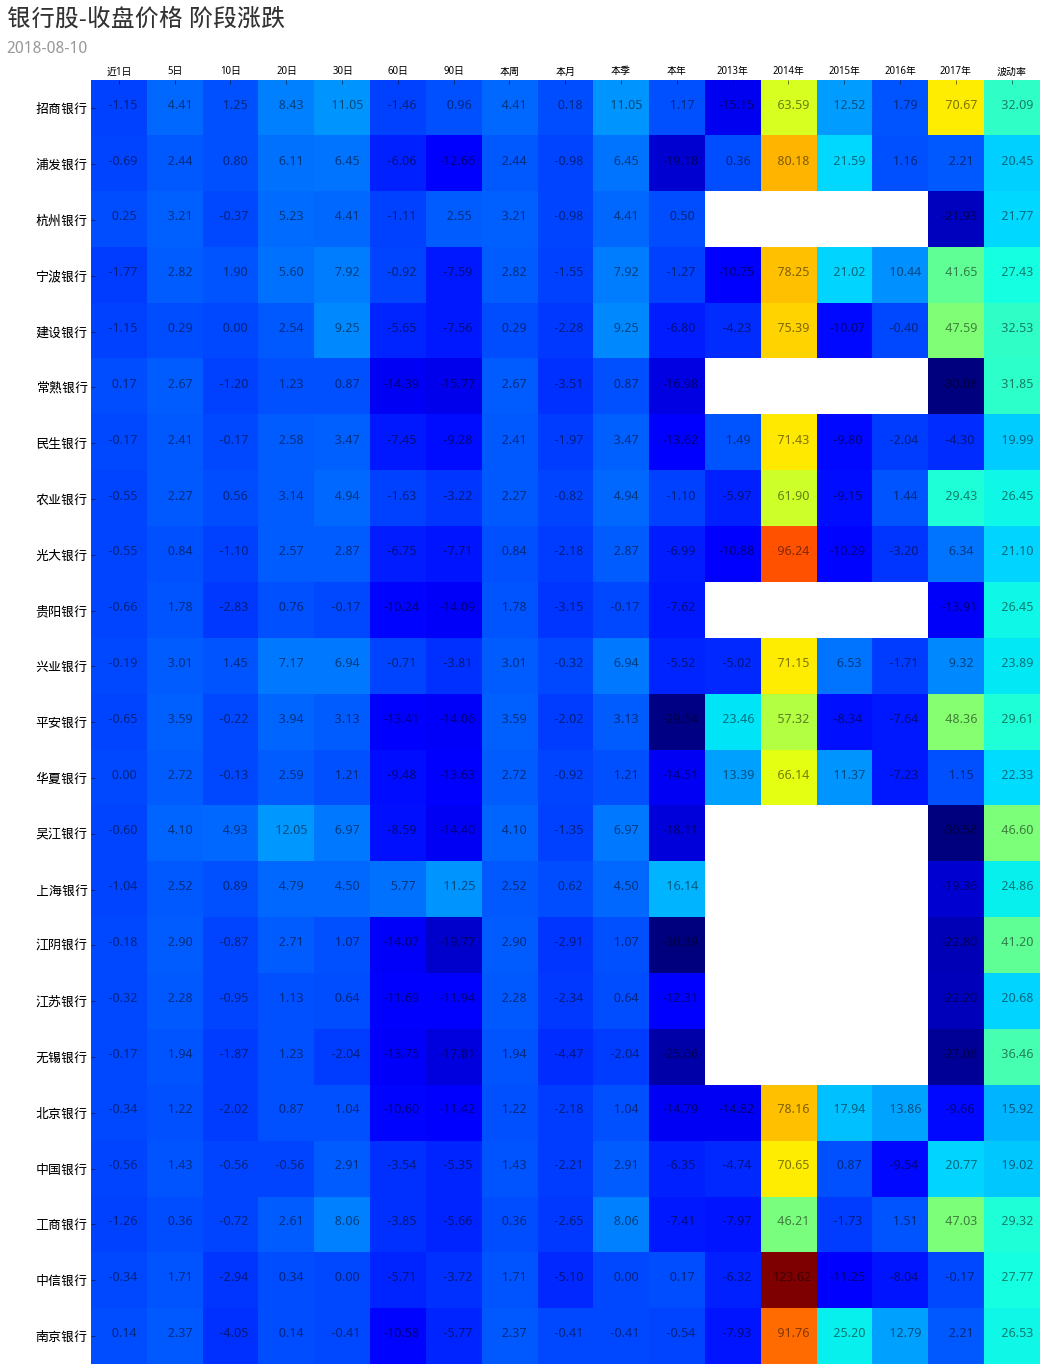

In [5]:
view.change()

## 5.走势图
1. PE、价格对比图；
2. PB、价格对比图；
3. ROE、价格对比图；

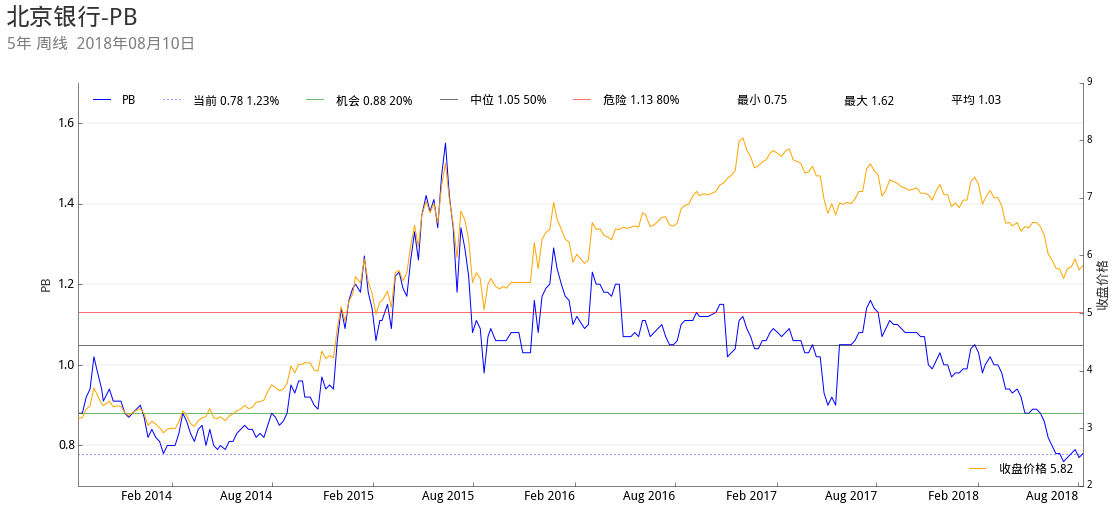

In [5]:
view.line_one()

## 6.走势对比图

In [ ]:
view.line_compar()